In [29]:
import pandas as pd
import matplotlib.pyplot as plt

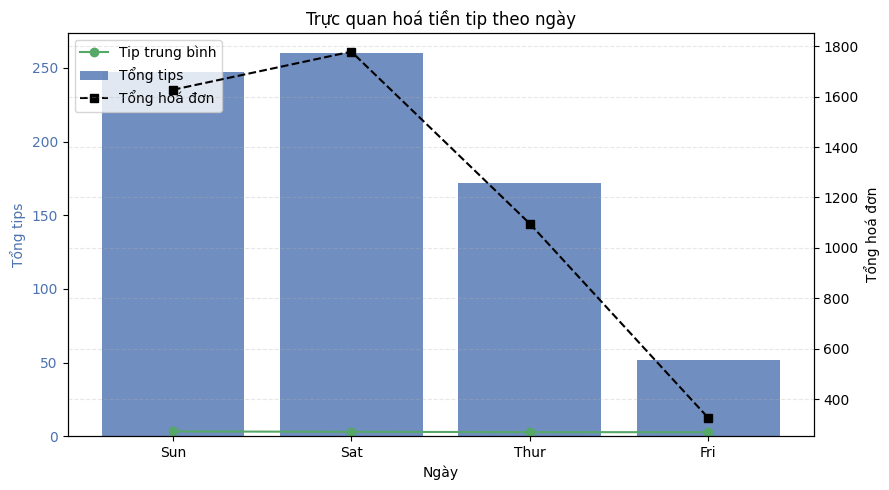

Tổng tips theo ngày:
 day
Sun     247.39
Sat     260.40
Thur    171.83
Fri      51.96
Name: tip, dtype: float64

Tip trung bình theo ngày:
 day
Sun     3.255132
Sat     2.993103
Thur    2.771452
Fri     2.734737
Name: tip, dtype: float64

Tổng hoá đơn theo ngày:
 day
Sun     1627.16
Sat     1778.40
Thur    1096.33
Fri      325.88
Name: total_bill, dtype: float64

Tỷ lệ tip trung bình theo ngày:
 day
Sun     0.166897
Sat     0.153152
Thur    0.161276
Fri     0.169913
dtype: float64


In [30]:
df = pd.read_csv("hw6_tips.csv")
df.columns = df.columns.str.strip().str.lower()

# kiểm tra cột bắt buộc
if 'tip' not in df.columns:
    raise ValueError(f"Không tìm thấy cột 'tip' trong hw6_tips.csv. Các cột hiện có: {list(df.columns)}")
if 'day' not in df.columns:
    raise ValueError(f"Không tìm thấy cột 'day' trong hw6_tips.csv. Các cột hiện có: {list(df.columns)}")

# ép kiểu số cho tip và total_bill nếu có
df['tip'] = pd.to_numeric(df['tip'], errors='coerce')
has_total = 'total_bill' in df.columns
if has_total:
    df['total_bill'] = pd.to_numeric(df['total_bill'], errors='coerce')

# thứ tự hiển thị ngày theo xuất hiện trong file
days_order = df['day'].astype(str).dropna().unique()

# Tính tổng và trung bình
tips_sum = df.groupby('day')['tip'].sum().reindex(days_order)
tips_mean = df.groupby('day')['tip'].mean().reindex(days_order)

if has_total:
    bill_sum = df.groupby('day')['total_bill'].sum().reindex(days_order)
    # đúng: tính tỉ lệ tip từng hàng rồi lấy trung bình theo ngày
    tip_pct_mean = (df['tip'] / df['total_bill']).groupby(df['day']).mean().reindex(days_order)
else:
    bill_sum = None
    tip_pct_mean = None

# Vẽ biểu đồ: bar cho tổng tips, line cho tip trung bình, trục phụ cho tổng hoá đơn
fig, ax1 = plt.subplots(figsize=(9,5))

ax1.bar(days_order, tips_sum, color='#4C72B0', alpha=0.8, label='Tổng tips')
ax1.set_xlabel('Ngày')
ax1.set_ylabel('Tổng tips', color='#4C72B0')
ax1.tick_params(axis='y', labelcolor='#4C72B0')

ax1.plot(days_order, tips_mean, color='#55A868', marker='o', label='Tip trung bình')

if bill_sum is not None:
    ax2 = ax1.twinx()
    ax2.plot(days_order, bill_sum, color='#000000', marker='s', linestyle='--', label='Tổng hoá đơn')
    ax2.set_ylabel('Tổng hoá đơn', color='#000000')
    ax2.tick_params(axis='y', labelcolor='#000000')

# gộp legend từ cả 2 trục
lines, labels = ax1.get_legend_handles_labels()
if bill_sum is not None:
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines += lines2
    labels += labels2
ax1.legend(lines, labels, loc='upper left')

plt.title('Trực quan hoá tiền tip theo ngày')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# In bảng tóm tắt
print("Tổng tips theo ngày:\n", tips_sum)
print("\nTip trung bình theo ngày:\n", tips_mean)
if bill_sum is not None:
    print("\nTổng hoá đơn theo ngày:\n", bill_sum)
    print("\nTỷ lệ tip trung bình theo ngày:\n", tip_pct_mean)